# Modelo de carga viral 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
sbn.set()

### Modelo dado

In [3]:
time = np.linspace(0, 10, 101)
A, B, alpha, beta = 90000, 90000, 0.3, 1
viral_load = []
for i in range (0, 101):
    f = A * np.exp(-alpha*time[i]) + B * np.exp(-beta*time[i])    
    viral_load.append(f)

### Cargamos los datos 

In [12]:
datos_hiv = pd.read_csv('HIVseries.csv', header=None)
datos_hiv.head()

,0,1
0,0.0000,106100.0
1,0.0831,93240.0
2,0.1465,166720.0
3,0.2587,153780.0
4,0.4828,118800.0


In [18]:
#Filtramos por tiempo y carga viral
time_days = np.array(datos_hiv[0])
load_hiv = np.array(datos_hiv[1])

### Modelo obtenido mediante regresión polinomial 

In [19]:
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree=2)

#Transformacion del arreglo
X_train = poli_reg.fit_transform(time_days.reshape(-1,1))
X_test = poli_reg.fit_transform(time.reshape(-1,1))

#Se define el modelo
p_modelo = LinearRegression()

#Se entrena el modelo
p_modelo.fit(X_train, load_hiv)

#Se predicen los datos
y_predecida = p_modelo.predict(X_test)

### Graficamos

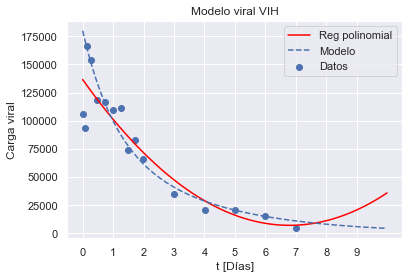

In [21]:
plt.plot(time, y_predecida, c="red", label="Reg polinomial")
plt.plot(time, viral_load, '--', label="Modelo")
plt.scatter(time_days,load_hiv, label="Datos")
plt.title("Modelo viral VIH")
plt.xlabel("t [Días]")
plt.xticks(range(0,10,1))
plt.ylabel("Carga viral")
plt.legend(loc="upper right")
plt.show()

#### Por lo tanto vemos de la grafica que el modelo obtenido mediante la regresion polinomial de grado 2 no es lo suficiente bueno para tratar el problema